# Inference

This notebook is dedicated to testing and visualizing results for both the wiki and podcast datasets

Note: 
Apologies for the gratuitous warnings. Tensorflow is aware of these issues and has rectified them in later versions of TensorFlow. Unfortunately, they persist for version 1.13. 

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/MSci/SliceCast
! git pull

Mounted at /content/gdrive
/content/gdrive/My Drive/MSci/SliceCast
Already up to date.


In [2]:
#Run ALL these if first time opening 
! pip3 install -r requirements.txt
! pip install objectpath
! pip install git+https://github.com/boudinfl/pke.git
! pip install keras==2.3.0 #1.15 doesnt exist

! pip install tensorflow==1.15
! pip install tensorflow_hub>=0.6.0
! pip3 install tensorflow_text==1.15

! pip install --upgrade tables


     |████████████████████████████████| 102kB 6.3MB/s 
     |████████████████████████████████| 163kB 14.1MB/s 
     |████████████████████████████████| 430kB 15.6MB/s 
     |████████████████████████████████| 10.8MB 9.3MB/s 
     |████████████████████████████████| 2.8MB 55.4MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
     |████████████████████████████████| 61kB 10.4MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 17.3MB 135kB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 1.2MB 53.0MB/s 
     |████████████████████████████████| 163kB 54.2MB/s 
     |████████████████████████████████| 614kB 49.5MB/s 
     |████████████████████████████████| 61kB 9.2MB/s 
     |████████████████████████████████| 25.2MB 1.3MB/s 
     |████████████████████████████████| 3.0MB 56.3MB/s 
     |████████████████████████████████| 3.2MB 42.1MB/s 


  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-wtzzzsww
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-wtzzzsww
     |████████████████████████████████| 245kB 9.3MB/s 
  Created wheel for pke: filename=pke-1.8.1-cp36-none-any.whl size=8763600 sha256=6ea7fcf07aafece0cec37bc1ca6a61ece57e66c29561a17456ea1a3c41445f25
  Stored in directory: /tmp/pip-ephem-wheel-cache-gz7r2bpm/wheels/8d/24/54/6582e854e9e32dd6c632af6762b3a5d2f6b181c2992e165462
Successfully built pke
     |████████████████████████████████| 378kB 8.9MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 412.3MB 34kB/s 
     |████████████████████████████████| 3.8MB 48.2MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
     |████████████████████████████████| 512kB 47.8MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp36-cp36m-linux_x86_64.whl size=67

In [3]:
#Run
import tensorflow as tf
import tensorflow_hub as hub
import keras

print('keras version:', keras.__version__)  # should be 2.3.0
print('tensorflow version', tf.__version__) # should be 1.15.0


keras version: 2.3.0
tensorflow version 1.15.0


Using TensorFlow backend.


In [4]:
#Come back to and run if issue with pke in next cell
! pip install git+https://github.com/boudinfl/pke.git

! python -m nltk.downloader stopwords
! python -m nltk.downloader universal_tagset
! python -m spacy download en # download the english model

  Cloning https://github.com/boudinfl/pke.git to /tmp/pip-req-build-4n93s6yi
  Running command git clone -q https://github.com/boudinfl/pke.git /tmp/pip-req-build-4n93s6yi
Processing /root/.cache/pip/wheels/48/5d/04/22361a593e70d23b1f7746d932802efe1f0e523376a74f321e/wrapt-1.10.11-cp36-cp36m-linux_x86_64.whl
  Created wheel for pke: filename=pke-1.8.1-cp36-none-any.whl size=8763600 sha256=ddc901c3a635913fe96d3b82e64bb91c8f6a4e82d61000f1a77ab4e3704764a3
  Stored in directory: /tmp/pip-ephem-wheel-cache-z74vd4lx/wheels/8d/24/54/6582e854e9e32dd6c632af6762b3a5d2f6b181c2992e165462
Successfully built pke
ERROR: tensorflow 1.15.0 has requirement wrapt>=1.11.1, but you'll have wrapt 1.10.11 which is incompatible.
ERROR: en-core-web-sm 2.2.5 has requirement spacy>=2.2.2, but you'll have spacy 2.0.18 which is incompatible.
  Found existing installation: wrapt 1.12.1
    Uninstalling wrapt-1.12.1:
      Successfully uninstalled wrapt-1.12.1


/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
     |████████████████████████████████| 37.4MB 1.1MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.0.0-cp36-none-any.whl size=37405978 sha256=ab95f2c7a01a2ba912658a76444ba1219994b05050f5693b1d6c009869d8dde2
  Stored in directory: /tmp/pip-ephem-wheel-cache-e5_m31qn/wheels/

In [ ]:
#Run
import nltk
import numpy
nltk.download('stopwords')

import pke

from src.SliceNet import SliceNet
from src.netUtils import getSingleExample
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math

import nltk
nltk.download('punkt')

import warnings
warnings.filterwarnings('ignore')

tf.logging.set_verbosity(tf.logging.ERROR)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
if type(tf.contrib) != type(tf): tf.contrib._warning = None
%load_ext autoreload
%autoreload 2

In [ ]:
! pip install numpy 

In [ ]:
## Sample predictions on unseen wiki articles
Note that this section relies on wikipedia

In [ ]:
## Sample predictions on unseen wiki articles
Note that this section relies on wikipedia

# Choose whether to use the base network or the network with self-attention
attention = True

# Current best networks
best_base_wiki = './models/04_20_2019_2300_final.h5'
best_base_podcast = './models/04_26_2019_1000_podcast.h5'
best_attn_wiki = './models/05_03_2019_0800_attn.h5'
best_attn_podcast = './models/05_02_2019_2200_attn_podcast.h5'

if attention:
    weights_wiki = best_attn_wiki
    weights_podcast = best_attn_podcast
else:
    weights_wiki = best_base_wiki
    weights_podcast = best_base_podcast

#Instantiate Network
net = SliceNet(classification=True,
               class_weights=[1.0, 7, 0.2],
               attention=attention)


In [ ]:
dataPath = Path('./wiki-sample/')
files = [str(x) for x in dataPath.glob('**/*') if x.suffix=='.hdf5']
mask = random.sample(range(0,len(files)), 1)

# randomly select a file to test
test_file = [x for (i,x) in enumerate(files) if i in mask][0]
print('test_file', test_file)

In [ ]:
k = 4
num_samples = 16

preds, labels, pk = net.predict(test_file=test_file,
                                num_samples=num_samples,
                                weights_path=weights_wiki,
                                k=k)
print('Average PK score with k={} on {} examples is: {:0.3f}'.format(k, num_samples, pk))

test_file wiki-sample/wiki_test_sample.hdf5


In [ ]:
np.set_printoptions(suppress=True)

preds = np.argmax(preds, axis=2)
labels = np.argmax(labels, axis=2)

NameError: ignored

In [ ]:
# Choose the index of the document you want to examine
idx = 2
# You can keep running this cell with different indices to visualize different
# documents within this batch of testing
# Note: The graph displays n sentences where n is the length of the longest
# document in the batch. As such, there may be padding sections at the beginning
# of the document with label and prediction of value 2

df = pd.DataFrame()
df['preds'] = preds[idx,:]
df['labels'] = labels[idx,:]
df['sent_number'] = df.index

fig, axes = plt.subplots(nrows=2, ncols=1)

df.plot(x='sent_number', y='preds', figsize=(10,5), grid=True, ax=axes[0])
df.plot(x='sent_number', y='labels', figsize=(10,5), grid=True, ax=axes[1], color='green')

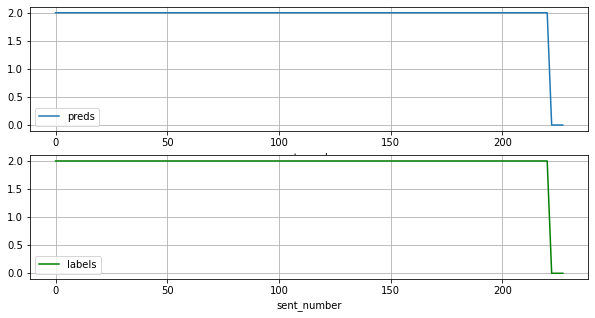

In [ ]:
## Sample predictions on unseen podcast data


test_file = './data/podcasts/hdf5/batch0_0.hdf5'
k = 33
num_samples = 2
preds, labels, pk = net.predict(test_file=test_file,
                    num_samples=num_samples,
                    weights_path=weights_podcast,
                    k=k)

print('Average PK score with k={} on {} examples is: {:0.3f}'.format(k, num_samples, pk))

In [ ]:
np.set_printoptions(suppress=True)

preds = np.argmax(preds, axis=2)
labels = np.argmax(labels, axis=2)

Starting Testing
Loaded weights from disk
Average PK score with k=33 on 2 examples is: 0.321


In [ ]:
# Choose the document you want to examine
idx = 1

df = pd.DataFrame()
df['preds'] = preds[idx,:]
df['labels'] = labels[idx,:]
df['sent_number'] = df.index

fig, axes = plt.subplots(nrows=2, ncols=1)

df.plot(x='sent_number', y='preds', figsize=(10,5), grid=True, ax=axes[0])
df.plot(x='sent_number', y='labels', figsize=(10,5), grid=True, ax=axes[1], color='green')
df_unseenpod = df

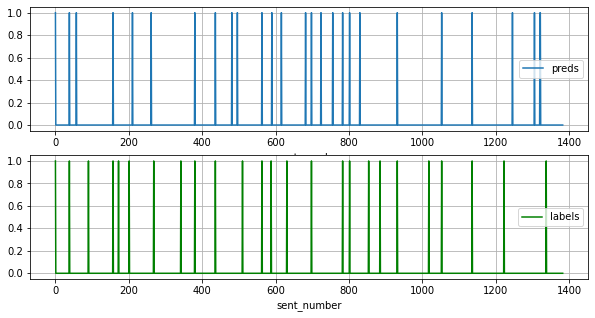

In [ ]:
df_unseenpod

In [ ]:
## Predictions on a single text file

,preds,labels,sent_number
0,1,1,0
1,0,0,1
2,0,0,2
3,0,0,3
4,0,0,4
...,...,...,...
1372,0,0,1372
1373,0,0,1373
1374,0,0,1374
1375,0,0,1375


! python -m spacy validate

In [ ]:
! python -m spacy download en_core_web_sm

In [ ]:
# The joe1254.txt doc has '========,9,title.' tags at manually labelled segments locations
text_file = './data/podcasts/with_timestamps/joe1254.txt'
is_labeled = True
weights_path = weights_podcast # transfer learning

sents, labels = getSingleExample(fname=text_file, is_labeled=is_labeled)
sents = np.expand_dims(sents, axis=0)
preds = net.singlePredict(sents, weights_path=weights_path)

In [ ]:
# Place data into a pandas dataframe for analysis
df = pd.DataFrame()

preds = np.argmax(np.squeeze(preds), axis=-1)
df['raw_sentences'] = sents[0]
if is_labeled:
    df['labels'] = labels
df['preds'] = preds
df['sent_number'] = df.index

fig, axes = plt.subplots(nrows=2, ncols=1)

df.plot(x='sent_number', y='preds', figsize=(10,5), grid=True, ax=axes[0])
df.plot(x='sent_number', y='labels', figsize=(10,5), grid=True, ax=axes[1], color='green')

Starting Testing
Loaded weights from disk


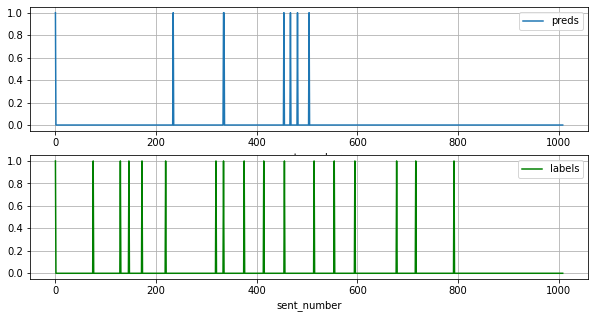

In [ ]:
## Keyword Extraction
The following cells are experimental code to extract keywords for each segment in order to provide context for each segment.

from src.postprocess import getSummaries, getTimeStamps
import nltk

nltk.download('stopwords')

keywords = getSummaries(sents[0], preds)
stamps = getTimeStamps(sents[0], './data/podcasts/with_timestamps/joe1254.json', preds)

In [ ]:
seconds = [x%60 for x in stamps]
minutes = [math.floor(x/60) for x in stamps]
for i, (x, y)in enumerate(zip(minutes, seconds)):
    print("{}:{}".format(x, y), end="")
    print([x[0] for x in keywords[i]])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Shona Section


0:0['people', 'things', 'something sherry']
2:58['people', 'medication today', 'opioids']
37:51['ton', 'loot', 'sure']
38:1['people', 'lot', 'time']
41:48['people', 'guys', 'somebody']
51:20['people', 'money', 'words']
53:8['guilty', 'lot', 'people']
56:3['guy', 'something', 'times']


In [ ]:
#Run to format the shortened version of the Joe Rogan podcast

from pathlib import Path
import re

def reformat_sgcw_remove_all(text):
    """
    Takes the Joe Rogan podcast transcript (which I already slightly pre-processed
    a while back) and turns it into a single long string of text without speakers 
    or times
    """

    print('Text format before preprocessing:\n', text[:300])

    # Strip all characters but letters and whitespace inside the speech
    content_1 = re.sub('\w+\s\w+;[0-9]{2}:[0-9]{2};', "", text)
    # Strip new-lines
    content_2 = re.sub('\n', " ", content_1)

    print('\nText format after preprocessing:\n', content_2)

    return content_2

# Paths
path_shorter = Path('./SGCW/shorter_formatted.txt')
path_shorter_and_formatted = Path('./SGCW/shorter_formatted_plain.txt')

# Reformat the (shortened) Joe Rogan transcript to be consistent w SliceCast podcasts
with open(path_shorter) as f_shorter:
    content = f_shorter.read()
better_format_text = reformat_sgcw_remove_all(content)

# Save shortened + formatted version of the Joe Rogan transcript
form_shorter_doc = open(path_shorter_and_formatted, 'w')
form_shorter_doc.write(better_format_text)
form_shorter_doc.close()

In [ ]:
# Segmentation using SliceCast on JoeRogan podcast
text_file = './SGCW/shorter_formatted_plain_labelled.txt'
is_labeled = True                             # I manually added segment tokens
weights_path = weights_podcast                # Transfer learning

sents, labels = getSingleExample(fname=text_file, is_labeled=is_labeled)
sents = np.expand_dims(sents, axis=0)

preds = net.singlePredict(sents, weights_path=weights_path)

     |████████████████████████████████| 4.3MB 5.4MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


Text format before preprocessing:
 Joe Rogan;00:00;Welcome back.
Elon Musk;00:02;Here we go again.
Joe Rogan;00:02;Great to see you and congratulations.
Elon Musk;00:04;Thank you.
Joe Rogan;00:05;You will never forget what is going on in the world when you think about when your child is born. You will know for the rest of this child’

Text format after preprocessing:
 Welcome back. Here we go again. Great to see you and congratulations. Thank you. You will never forget what is going on in the world when you think about when your child is born. You will know for the rest of this child’s life, you were born during a weird time. That’s for sure. That is for sure. Probably the weirdest that I can remember. Yeah. Yeah, and he was born on May the fourth. That’s hilarious, too. Yeah. May the fourth be with him. Yes, exactly. It has to be. Hopefully. I sure hope so. Perfect. Yes. I mean that was the perfect day for you. How do you say the name? Is it placeholder? First of all, my partner is th

In [ ]:
# Place data into a pandas dataframe for analysis...
df = pd.DataFrame()
preds = np.argmax(np.squeeze(preds), axis=-1)
df['raw_sentences'] = sents[0]
if is_labeled:
    df['labels'] = labels
df['preds'] = preds
df['sent_number'] = df.index

# Plot
print('Segmentation of Joe Rogan Podcast, predictions vs. Labels:')
fig, axes = plt.subplots(nrows=2, ncols=1)
df.plot(x='sent_number', y='preds', figsize=(10,5), grid=True, ax=axes[0])
df.plot(x='sent_number', y='labels', figsize=(10,5), grid=True, ax=axes[1], color='green')

# Also save dataframe of segments to hdf5 file
df.to_hdf('./SGCW/segd_shorter_formatted_plain.h5', key='dfs', mode='w')

Starting Testing
Loaded weights from disk


Segmentation of Joe Rogan Podcast, predictions vs. Labels:


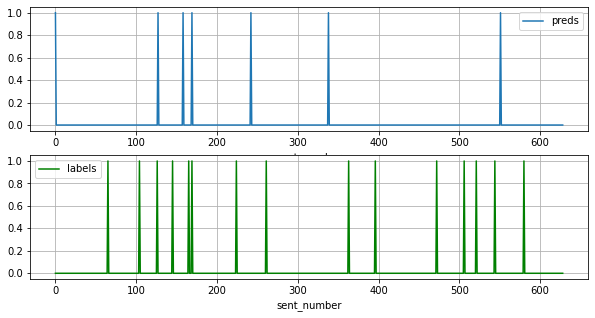

In [ ]:
# Produce tables of data about the segmentation process, and extract Keywords

from src.postprocess import getTimeStamps
import nltk
nltk.download('stopwords')

def getSummaries(doc, labels, n=3):
    """
    Added variable n number for multiple keyword extraction
    """
    summaries = []
    segment = ''
    numSent = 0
    #k = 0 #not using?
    for i, sent in enumerate(doc):
      ##looping through sentences
      if labels[i]==1 and segment != '':
        ## label==1 if its the first sentence of a segment 
        ##(but doesn't enter if it's the first sentence of the first segment)
        extractor = pke.unsupervised.TopicRank()
        extractor.load_document(input=segment, language='en')
        extractor.candidate_selection()
        extractor.candidate_weighting()
        summaries.append(extractor.get_n_best(n))
        #k = k+1 #not using?
        segment = sent
        numSent = 1
      else:
        ##First sentence enters here
        ##+ then all sentences WITHIN segments after (i.e. not the first sents)
        segment = segment + " " + sent
        numSent = numSent + 1
    
    ##'segment' is a long string of sentences from the last segment
    ## the next few lines deal with the final segment (i think..)
    extractor = pke.unsupervised.TopicRank()
    extractor.load_document(input=segment, language='en')
    extractor.candidate_selection()
    extractor.candidate_weighting()

    summaries.append(extractor.get_n_best(n))

    return summaries

def get_keywords(text, n=100):
  """
  get top 100 keywords for the entire transcript
  """
  extractor = pke.unsupervised.TopicRank()
  extractor.load_document(input=text, language='en')
  extractor.candidate_selection()
  extractor.candidate_weighting()

  top_keywords = extractor.get_n_best(n)
  return top_keywords

def get_segments_info(df, timestamps=False):
  """

  """
  segments_dict = {'first_sent_numbers' : [], 'length_of_segment': [],
                   'keyword_list' : [], }

  df_mini = df[df['preds']==1]  
  old_idx = 0
  for idx, row in df_mini.iterrows():
    segments_dict['first_sent_numbers'].append(idx)   # POSITION of each section
    length = np.int(idx) - np.int(old_idx)            # LENGTH of each section
    segments_dict['length_of_segment'].append(length) 
    old_idx = idx

  keywords = getSummaries(df['raw_sentences'], df['preds'], n=5) # KEYWORDS
  if timestamps:
    segments_dict['first_sent_times'] = []
    stamps = getTimeStamps(df['raw_sentences'], 
                         './data/podcasts/with_timestamps/joe1254.json', 
                         df['preds'])                            # TIMESTAMPS 

    seconds = [x%60 for x in stamps]
    minutes = [math.floor(x/60) for x in stamps]
    for i, (x, y)in enumerate(zip(minutes, seconds)):
        segments_dict['first_sent_times'].append(f'{x}:{y}')
  
  for i in range(len(keywords)):
    segments_dict['keyword_list'].append([x[0] for x in keywords[i]])

  # Convert dictionary to dataframe
  df = pd.DataFrame({k: pd.Series(l) for k, l in segments_dict.items()})
  
  return df

def get_predicted_segs_info(df, JoeRogan=True):
  """

  """
  label_segments_dict = {'first_sent_numbers' : [], 'length_of_segment': [], 
                   'keyword_list' : [], }
  if JoeRogan:
    keywords_list_sgcw = [
                          ['Neural Nets', 'AI', 'Brain'], 
                          ['Moving House', 'Materialistic Belongings'], 
                          ['Materialistic Belongings', 'Money', 'Wealth'],
                          ['People','Need','Manufacturing', 'Making', 'Fewer Law Grads'],
                          ['Materialistic Belongings'],
                          ['Gene Wilder', "Gene Wilder's House"],
                          ['Time Management', 'Productivity'],
                          ['Neuralink', 'Neuralink Implant Procedure', 'Benefits'],
                          ['AI symbiosis'], 
                          ['Communication', 'Language','Brain', 'Complexity'],
                          ['Alien', 'Biological Being'],
                          ['Memory', 'Changing your past'],
                          ['Simulation', 'Brain', 'Senses'],
                          ['Conciousness'],
                          ['Self-Improvement', 'Being less-wrong']
                          ]
  label_segments_dict['keyword_list'] = keywords_list_sgcw

  df_mini = df[df['labels']==1]  
  old_idx = 0
  for idx, row in df_mini.iterrows():
    label_segments_dict['first_sent_numbers'].append(idx)   # POSITION of each section
    length = np.int(idx) - np.int(old_idx)            # LENGTH of each section
    label_segments_dict['length_of_segment'].append(length) 
    old_idx = idx

  # Convert dictionary to dataframe
  df = pd.DataFrame({k: pd.Series(l) for k, l in label_segments_dict.items()})
  
  return df

## TRIAL with a SliceCast example podcast...
# df = pd.read_hdf('./SGCW/df_single_text_file.h5')
# trial_segments_df = get_segments_info(df)
# trial_segments_df

path = Path('./SGCW/shorter_formatted_plain.txt')
with open(path) as f:
    content = f.read()
keywords = get_keywords(content)
top_keywords = []
for i in range(len(keywords)):
  top_keywords.append(keywords[i][0])
print('len(top_keywords)', len(top_keywords))
print('top_keywords', top_keywords)

In [ ]:
# RUN: Inference-Segmented Data 'Slice'
df = pd.read_hdf('./SGCW/segd_shorter_formatted_plain.h5')

seg_df = get_segments_info(df)
seg_df.to_hdf('./SGCW/segs_slice_info.h5', key='dfs', mode='w')
seg_df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
len(top_keywords) 100
top_keywords ['things', 'brain', 'time', 'little people', 'houses', 'ways', 'lot', 'years', 'great', 'better', 'something', 'sure', 'sort', 'everything', 'passive device', 'scary word', 'future iterations', 'humans', 'different', 'company', 'product', 'neural nets', 'less capital', 'babies', 'little details', 'others', 'top', 'wrong', 'inch', 'stuff', 'consciousness', 'united states', 'tiny wires', 'mars', 'interesting', 'version', 'kind', 'lay person', 'diameter', 'day', 'boring', 'real', 'principles', 'artificial intelligence', 'right', 'hydrogen', 'new universal language', 'place', 'much', 'complex concept', 'idea', 'fact', 'neuralink', 'language', 'electrode threads', 'skull', 'bunch', 'memory', 'big difference', 'specific areas', 'whatever language', 'awesome', 'drugs', 'campfires', 'fish', 'finance', 'law', 'entire sensory experience', 'some

In [ ]:
# RUN: Manually-Segmented Data 'Manual'
df = pd.read_hdf('./SGCW/segd_shorter_formatted_plain.h5')

label_seg_df = get_predicted_segs_info(df)
label_seg_df.to_hdf('./SGCW/segs_manual_info.h5', key='dfs', mode='w')
label_seg_df

,first_sent_numbers,length_of_segment,keyword_list
0,0,0,"[neural nets, great, brain, ways, babies]"
1,127,127,"[company, people, better way, products, bad th..."
2,158,31,"[houses, good use, valuable service, time, goo..."
3,169,11,"[house, mars, time, thing, people]"
4,242,73,"[passive device, deep brain stimulation, inch,..."
5,338,96,"[year, brain injury, thing, scary word, everyt..."
6,551,213,"[way, wrong, people, potential future versions..."


,first_sent_numbers,length_of_segment,keyword_list
0,65,65,"[Neural Nets, AI, Brain]"
1,104,39,"[Moving House, Materialistic Belongings]"
2,126,22,"[Materialistic Belongings, Money, Wealth]"
3,145,19,"[People, Need, Manufacturing, Making, Fewer La..."
4,165,20,[Materialistic Belongings]
5,169,4,"[Gene Wilder, Gene Wilder's House]"
6,224,55,"[Time Management, Productivity]"
7,261,37,"[Neuralink, Neuralink Implant Procedure, Benef..."
8,363,102,[AI symbiosis]
9,396,33,"[Communication, Language, Brain, Complexity]"


In [ ]:
# Visualisation of Topics



! pip install --upgrade gensim

In [ ]:
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk.data
import string
from gensim.models import Phrases


def Use_Whole_Transcript(path):
  content = []
  # Reformat the (shortened) Joe Rogan transcript to be consistent w SliceCast podcasts
  with open(path) as f:
    content = f.read()

    # # reading each line  
    # for line in f:
    #     content.append(line)
    #     # reading each word         
    #     for word in line.split():            
    #         content.append(word)

  # Split into sentences
  sents = nltk.tokenize.sent_tokenize(content)
  #print(sents)

  # Remove punctuation
  sents_ohne_punc = [''.join(c for c in s if c not in string.punctuation) for s in sents]
  # Remove empty strings
  final_sents = [s for s in sents_ohne_punc if s]
  #print(final_sents)

  content = []
  for sentence in final_sents:
      words = sentence.split()
      words_lower = [word.lower() for word in words]
      content.append(words_lower)

  return content

def Run_Model(keywords):
  # train model
  model = Word2Vec(keywords, min_count=1)
  # summarize the loaded model
  # print(model)
  # summarize vocabulary
  words = list(model.wv.vocab)
  # print(words)
  # access vector for one word
  # print(model['sentence'])
  # save model
  model.save('model.bin')
  # load model
  new_model = Word2Vec.load('model.bin')

  # fit a 2d PCA model to the vectors
  X = model[model.wv.vocab]
  pca = PCA(n_components=2)
  results = pca.fit_transform(X)  

  return results, words


def Detect_Key_Phrases(words_out, keywords):
  """
  the words 
  """



just_keywords = False # Trains only on the keywords extracted from each segment
all_words = False     # Will train Word2Vec on whole transcript
gensim_phraser = True # Will extract phrases uses gensim.models.phrases

if just_keywords:
  ## LOAD DATA---------------------------
  segs_manual_info_df = pd.read_hdf('./SGCW/segs_manual_info.h5', key='dfs')
  keywords_manual = segs_manual_info_df['keyword_list'].values
  print('\nkeywords_manual (Content put into model):', keywords_manual)

  segs_slice_info_df = pd.read_hdf('./SGCW/segs_slice_info.h5', key='dfs')
  keywords_slice = segs_slice_info_df['keyword_list'].values
  print('\nkeywords_slice (Content put into model):', keywords_slice, '\n')

  ## MANUAL ------------------------------
  results_manual, words_manual = Run_Model(keywords_manual)
  xs_manual = results_manual[:, 0]
  ys_manual = results_manual[:, 1]
  print('words_manual (Content out of model): ', words_manual)

  ## SLICECAST ---------------------------
  results_slice, words_slice= Run_Model(keywords_slice)
  xs_slice = results_slice[:, 0]
  ys_slice = results_slice[:, 1]
  print('words_slice (Content out of model): ', words_slice)

  ## SCATTER PLOTS -------------
  f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                              figsize=(18,9))
  f.suptitle('Word2Vec Word Embedding Plots')

  ax1.scatter(xs_manual, ys_manual)
  for i, word in enumerate(words_manual):
    ax1.annotate(word, xy=(results_manual[i, 0], results_manual[i, 1]))
  ax1.set_title('Manual')

  ax2.scatter(xs_slice, ys_slice)
  for i, word in enumerate(words_slice):
    ax2.annotate(word, xy=(results_slice[i, 0], results_slice[i, 1]))
  ax2.set_title('SliceCast + ')

  f.show()

if all_words:
  print('top_keywords', top_keywords)
  results, words = Run_Model(top_keywords)
  xs = results[:, 0]
  ys = results[:, 1]
  print('words out: ', words)


  segs_slice_info_df = pd.read_hdf('./SGCW/segs_slice_info.h5', key='dfs')
  keywords_slice = segs_slice_info_df['keyword_list'].values
  keywords_slice_flat = [item for sublist in keywords_slice for item in sublist]
  print('\nkeywords_slice:', keywords_slice_flat, '\n')

  # Only want to plot they keywords
  (xs_key, ys_key, ordered_keywords) = ([], [], [])
  for i, word in enumerate(words):
    if word in keywords_slice_flat:
      xs_key.append(xs[i])
      ys_key.append(ys[i])
      ordered_keywords.append(word)

  plt.figure()
  plt.scatter(xs_key, ys_key)
  for i, word in enumerate(ordered_keywords):
      plt.annotate(word, xy=(xs_key[i], ys_key[i]))
  plt.title('SliceCast keywords with Word2Vec trained on Entire transcript')

  plt.show()

if gensim_phraser:
  path = Path('./SGCW/shorter_formatted_plain.txt')
  content = Use_Whole_Transcript(path)
  print('content being put in: ', content)
  phrases = Phrases(content, min_count=4, threshold=3)
  #sent = [u'the', u'mayor', u'of', u'new', u'york', u'was', u'there']
  sent = [u'also', u'i’ve', u'spent', u'a', u'lot', u'of', u'time', u'on', u'ai', u'and', u'neural', u'nets']
  print(phrases[sent])

  sents = [[u'trees', u'graph', u'minors'], [u'graph', u'minors']]
  for phrase in phrases[content]:
      print(phrase)


In [12]:
# Phrase selection


content being put in:  [['welcome', 'back'], ['here', 'we', 'go', 'again'], ['great', 'to', 'see', 'you', 'and', 'congratulations'], ['thank', 'you'], ['you', 'will', 'never', 'forget', 'what', 'is', 'going', 'on', 'in', 'the', 'world', 'when', 'you', 'think', 'about', 'when', 'your', 'child', 'is', 'born'], ['you', 'will', 'know', 'for', 'the', 'rest', 'of', 'this', 'child’s', 'life', 'you', 'were', 'born', 'during', 'a', 'weird', 'time'], ['that’s', 'for', 'sure'], ['that', 'is', 'for', 'sure'], ['probably', 'the', 'weirdest', 'that', 'i', 'can', 'remember'], ['yeah'], ['yeah', 'and', 'he', 'was', 'born', 'on', 'may', 'the', 'fourth'], ['that’s', 'hilarious', 'too'], ['yeah'], ['may', 'the', 'fourth', 'be', 'with', 'him'], ['yes', 'exactly'], ['it', 'has', 'to', 'be'], ['hopefully'], ['i', 'sure', 'hope', 'so'], ['perfect'], ['yes'], ['i', 'mean', 'that', 'was', 'the', 'perfect', 'day', 'for', 'you'], ['how', 'do', 'you', 'say', 'the', 'name'], ['is', 'it', 'placeholder'], ['first', 

from gensim.models import Phrases

documents = ["the mayor of new york was there", "machine learning can be useful sometimes","new york mayor was present"]

sentence_stream = [doc.split(" ") for doc in documents]
 = Phrases(sentence_stream, min_count=1, threshold=1)
sent = [u'the', u'mayor', u'of', u'new', u'york', u'was', u'there']
print(bigram[sent])

In [ ]:
#from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases
#from gensim.models import phrases


!pwd
# Load corpus and train a model.
sentences = Text8Corpus(datapath('testcorpus.txt'))
phrases = Phrases(sentences, min_count=1, threshold=1) #connector_words=phrases.ENGLISH_CONNECTOR_WORDS

# Use the model to detect phrases in a new sentence.
sent = [u'trees', u'graph', u'minors']
print(phrases[sent])
#[u'trees_graph', u'minors']

# Or transform multiple sentences at once.
sents = [[u'trees', u'graph', u'minors'], [u'graph', u'minors']]
for phrase in phrases[sents]:
    print(phrase)
#[u'trees_graph', u'minors']
[u'graph_minors']
#>>>
# Export a FrozenPhrases object that is more efficient but doesn't allow any more training.
#frozen_phrases = phrases.freeze()
#print(frozen_phrases[sent])
#[u'trees_graph', u'minors']

['the', 'mayor', 'of', 'new_york', 'was', 'there']


In [ ]:
#represent sentences by a 2-d matrix of cleaned tokens
import re

def get_sentences(input_file_pointer):
    while True:
        line = input_file_pointer.readline()
        if not line:
            break

        yield line

def clean_sentence(sentence):
    sentence = sentence.lower().strip()
    sentence = re.sub(r’[^a-z0-9\s]’, '’, sentence)
    return re.sub(r’\s{2,}’, ' ', sentence)

from spacy.lang.en.stop_words import STOP_WORDS
def tokenize(sentence):
    return [token for token in sentence.split() if token not in STOP_WORDS]

/content/gdrive/My Drive/MSci/SliceCast/SGCW
['trees_graph', 'minors']
['trees_graph', 'minors']
['graph_minors']


['graph_minors']

In [ ]:
## N-GRAM EXTRACTION 
from gensim.models.phrases import Phrases, Phraser

def build_phrases(sentences):
    phrases = Phrases(sentences,
                      min_count=2,
                      threshold=3,
                      progress_per=1000)
    return Phraser(phrases)

phrases_model.save('phrases_model.txt')

      

In [ ]:

phrases_model= Phraser.load('phrases_model.txt')

def sentence_to_bi_grams(phrases_model, sentence):
    return ' '.join(phrases_model[sentence])

def sentences_to_bi_grams(n_grams, input_file_name, output_file_name):
    with open(input_file_name, 'r') as input_file_pointer:
        with open(output_file_name, 'w+') as out_file:
            for sentence in get_sentences(input_file_pointer):
                cleaned_sentence = clean_sentence(sentence)
                tokenized_sentence = tokenize(cleaned_sentence)
                parsed_sentence = sentence_to_bi_grams(n_grams, tokenized_sentence)
                out_file.write(parsed_sentence + '\n')


In [ ]:
# Rest of stuff



## Create Dict out of Word Embeddings
# Manual-----------------------------
Keyword_Embeddings_dict_manual = {'Word':[], 'X': [], 'Y': []}

for i, word in enumerate(words_manual):
  Keyword_Embeddings_dict_manual['Word'].append(word)
  Keyword_Embeddings_dict_manual['X'].append(result_manual[i, 0])
  Keyword_Embeddings_dict_manual['Y'].append(result_manual[i, 1])

Keyword_Embeddings_df_manual = pd.DataFrame({k: pd.Series(l) for k, l in Keyword_Embeddings_dict_manual.items()})
Keyword_Embeddings_df_manual.to_hdf('./SGCW/Keyword_Embeddings_df_manual.h5', key='dfs', mode='w')

Keyword_Embeddings_df_manual

In [ ]:
## Create Dict out of Word Embeddings
# SliceCast-------------------------
Keyword_Embeddings_dict_slice = {'Word':[], 'X': [], 'Y': []}

for i, word in enumerate(words_slice):
  Keyword_Embeddings_dict_slice['Word'].append(word)
  Keyword_Embeddings_dict_slice['X'].append(result_slice[i, 0])
  Keyword_Embeddings_dict_slice['Y'].append(result_slice[i, 1])

Keyword_Embeddings_df_slice = pd.DataFrame({k: pd.Series(l) for k, l in Keyword_Embeddings_dict_slice.items()})
Keyword_Embeddings_df_slice.to_hdf('./SGCW/Keyword_Embeddings_df_slice.h5', key='dfs', mode='w')
Keyword_Embeddings_df_slice

,Word,X,Y
0,Neural Nets,-0.004293,-0.003445
1,AI,0.002546,0.004029
2,Brain,0.010304,-0.008455
3,Moving House,-0.001997,0.000246
4,Materialistic Belongings,0.003848,-0.003504
5,Money,-0.001099,0.002979
6,Wealth,-0.000527,0.009331
7,People,0.002909,0.019577
8,Need,-0.003732,-0.003989
9,Manufacturing,-0.007380,0.005514


In [ ]:
## CALCULATE AVERAGE TOPIC POSITION for each segment
# i.e. average of the word vectors in each list (each list corresponds to a segment)
Keywo_Embed_df_manual = pd.read_hdf('./SGCW/Keyword_Embeddings_df_manual.h5', key='dfs')
Keywo_Embed_df_slice = pd.read_hdf('./SGCW/Keyword_Embeddings_df_slice.h5', key='dfs')

segs_manual_info_df = pd.read_hdf('./SGCW/segs_manual_info.h5', key='dfs')
keywords_manual = segs_manual_info_df['keyword_list'].values

segs_slice_info_df = pd.read_hdf('./SGCW/segs_slice_info.h5', key='dfs')
keywords_slice = segs_slice_info_df['keyword_list'].values

(av_xs_manual, av_ys_manual, segment_numbs_manual) = ([], [], [])
(av_xs_slice, av_ys_slice, segment_numbs_slice) = ([], [], [])


for idx, list_manual in enumerate(keywords_manual):
  ## MANUAL
  # Access XY coord for each word in the sublist
  word_list_X = []
  word_list_Y = []
  for word in list_manual:
    #print(word)
    word_list_X.append(Keywo_Embed_df_manual[Keywo_Embed_df_manual['Word']==word].X.values[0])
    word_list_Y.append(Keywo_Embed_df_manual[Keywo_Embed_df_manual['Word']==word].Y.values[0])

  # Finding average positions
  av_xs_manual.append(np.mean(word_list_X))
  av_ys_manual.append(np.mean(word_list_Y))
  
  segment_numbs_manual.append(idx)

for idx, list_slice in enumerate(keywords_slice):
  ## SLICE--------------------------------------
  # Access XY coord for each word in the sublist
  word_list_X = []
  word_list_Y = []
  for word in list_slice:
    #print(word)
    word_list_X.append(Keywo_Embed_df_slice[Keywo_Embed_df_slice['Word']==word].X.values[0])
    word_list_Y.append(Keywo_Embed_df_slice[Keywo_Embed_df_slice['Word']==word].Y.values[0])

  # Finding average positions
  av_xs_slice.append(np.mean(word_list_X))
  av_ys_slice.append(np.mean(word_list_Y))


  segment_numbs_slice.append(idx)
  
  
Topic_avs_df_manual = pd.DataFrame()
Topic_avs_df_slice = pd.DataFrame()
# Add to new df with Topic Number, Words, Av word embedding Position
Topic_avs_df_manual['Topic_Num'] = segment_numbs_manual
Topic_avs_df_slice['Topic_Num'] = segment_numbs_slice

Topic_avs_df_manual['Av_X'] = av_xs_manual
Topic_avs_df_manual['Av_Y'] = av_ys_manual

Topic_avs_df_slice['Av_X'] = av_xs_slice
Topic_avs_df_slice['Av_Y'] = av_ys_slice

# Plot the scatter of Av word embedding Position
Topic_avs_df_manual.to_hdf('./SGCW/Topic_avs_df_manual.h5', key='dfs', mode='w')
Topic_avs_df_slice.to_hdf('./SGCW/Topic_avs_df_slice.h5', key='dfs', mode='w')

Topic_avs_df_manual
#should have 15 topics

,Word,X,Y
0,neural nets,-0.001748,-0.010652
1,great,-0.012754,0.005193
2,brain,0.004367,0.003724
3,ways,0.011452,0.002353
4,babies,-0.006557,-0.001379
5,company,-0.000755,-0.006523
6,people,-0.003895,0.011002
7,better way,0.010997,-0.002810
8,products,-0.009035,-0.005629
9,bad thing,0.017558,-0.003234


In [ ]:
Topic_avs_df_slice
# should have fewer topics than manual above (6)

,Topic_Num,Av_X,Av_Y
0,0,0.002852,-0.002624
1,1,0.000926,-0.001629
2,2,0.000741,0.002935
3,3,-0.001603,0.002485
4,4,0.003848,-0.003504
5,5,0.005192,-0.001241
6,6,0.001878,0.009925
7,7,-0.000312,-0.002808
8,8,-0.005984,-0.012508
9,9,0.002612,0.003558


In [ ]:
df_manual = pd.read_hdf('./SGCW/Topic_avs_df_manual.h5', key='dfs')
df_slice = pd.read_hdf('./SGCW/Topic_avs_df_slice.h5', key='dfs')

f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,
                             figsize=(18,9)) #sharex=True
f.suptitle('Averaged word embeddings for Keywords in each Podcast Segment')


## MANUAL 
labels = df_manual['Topic_Num'].values
xs = df_manual['Av_X'].values
ys = df_manual['Av_Y'].values

ax1.quiver(xs[:-1], ys[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1], scale_units='xy', 
           angles='xy', scale=1, color='b', width=0.005)

# zip joins x and y coordinates in pairs
for x, y, label in zip(xs, ys, labels):

    ax1.annotate(label+1, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

#plot special colours for the first and last point
ax1.plot([xs[0]], [ys[0]], 'o', color='green', markersize=10, label='Beginning of Conversation')
ax1.plot([xs[-1]], [ys[-1]], 'o', color='red', markersize=10, label='End of Conversation')
ax1.set_title('Manual')

## SLICECAST
labels = df_slice['Topic_Num'].values
xs = df_slice['Av_X'].values
ys = df_slice['Av_Y'].values

ax2.quiver(xs[:-1], ys[:-1], xs[1:]-xs[:-1], ys[1:]-ys[:-1], scale_units='xy', 
           angles='xy', scale=1, color='b', width=0.005)

# zip joins x and y coordinates in pairs
for x, y, label in zip(xs, ys, labels):

    ax2.annotate(label+1, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

#plot special colours for the first and last point
ax2.plot([xs[0]], [ys[0]], 'o', color='green', markersize=10)
ax2.plot([xs[-1]], [ys[-1]], 'o', color='red', markersize=10)

ax2.set_title('SliceCast')
f.legend()
f.show()

,Topic_Num,Av_X,Av_Y
0,0,-0.001048,-0.000152
1,1,0.002974,-0.001439
2,2,0.003181,0.002896
3,3,-0.005393,0.004602
4,4,0.000220,-0.004833
5,5,-0.001546,0.000352
6,6,-0.004588,0.004567


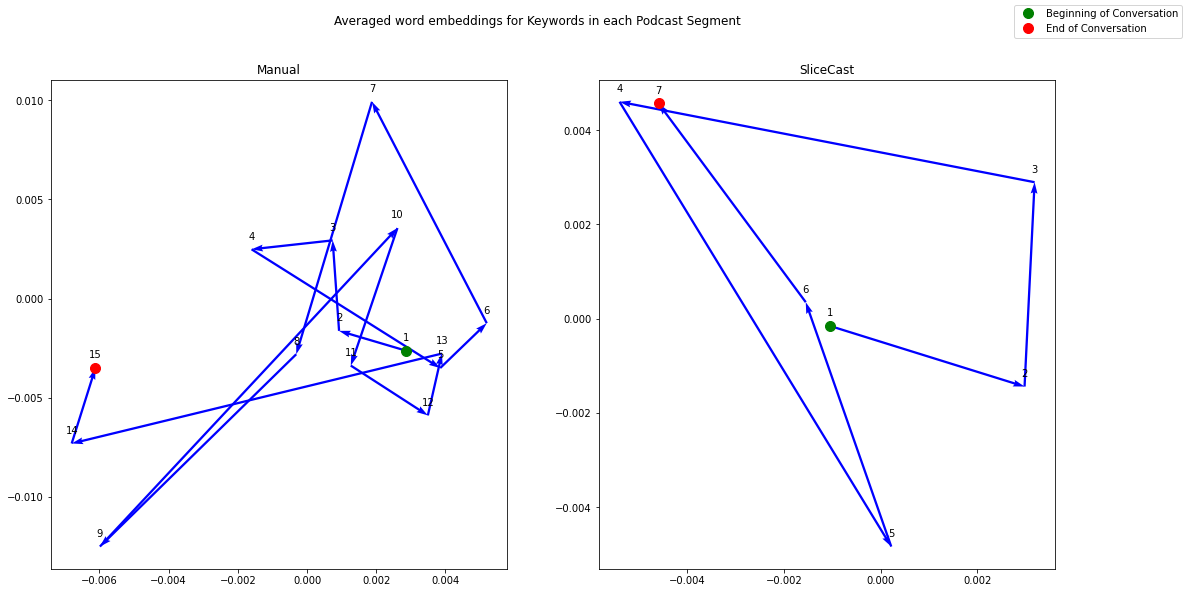

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits import mplot3d

df_manual = pd.read_hdf('./SGCW/Topic_avs_df_manual.h5', key='dfs')
labels_manual = df_manual['Topic_Num'].values
df_slice = pd.read_hdf('./SGCW/Topic_avs_df_slice.h5', key='dfs')
labels_slice = df_slice['Topic_Num'].values

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(22,11)) #plt.figaspect(0.5))
fig.suptitle('Movement through topic space over time')

# set up the axes for the first plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

## MANUAL------------------------------------------
# Data for a three-dimensional line
word_emb_xs = df_manual['Av_X'].values
word_emb_ys = df_manual['Av_Y'].values
segment_numbers = range(len(word_emb_xs))

#ax.plot3D(xs, segment_numbers, ys, 'bo-')
ax1.set_xlabel('$time (Segment Number)$', fontsize=13)
ax1.set_zlabel('$Y$', fontsize=20)
ax1.set_ylabel('$X$', fontsize=20, rotation = 0)
ax1.zaxis.set_rotate_label(False) 
ax1.set_title('Manual')

for x, y, z, label in zip(segment_numbers, word_emb_xs, word_emb_ys, labels_manual):
  ax1.plot([x], [y], [z],'o-')
  ax1.text(x, y, z, label+1, size=10)

## AXIS STUFF
ax1.dist = 13
ax1 = plt.gca()
#ax1.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax1.zaxis.set_ticklabels([])

# for line in ax1.xaxis.get_ticklines():
#     line.set_visible(False)
for line in ax1.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax1.zaxis.get_ticklines():
    line.set_visible(False)

## SLICE---------------------------------------------
# Data for a three-dimensional line
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
word_emb_xs = df_slice['Av_X'].values
word_emb_ys = df_slice['Av_Y'].values
segment_numbers = range(len(word_emb_xs))

#ax.plot3D(xs, segment_numbers, ys, 'bo-')
ax2.set_xlabel('$time (Segment Number)$', fontsize=13)
ax2.set_zlabel('$Y$', fontsize=20)
ax2.set_ylabel('$X$', fontsize=20, rotation = 0)
ax2.zaxis.set_rotate_label(False) 
ax2.set_title('SliceCast')

for x, y, z, label in zip(segment_numbers, word_emb_xs, word_emb_ys, labels_slice):
  ax2.plot([x], [y], [z],'o-')
  ax2.text(x, y, z, label+1, size=10)

## AXIS STUFF
ax2.dist = 13
ax2 = plt.gca()
#ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax2.zaxis.set_ticklabels([])

# for line in ax2.xaxis.get_ticklines():
#     line.set_visible(False)
for line in ax2.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax2.zaxis.get_ticklines():
    line.set_visible(False)

fig.show()

#NOT PLOTTING ALL THE POINTS! MANUAL SHOULD HAVE LIKE 15!

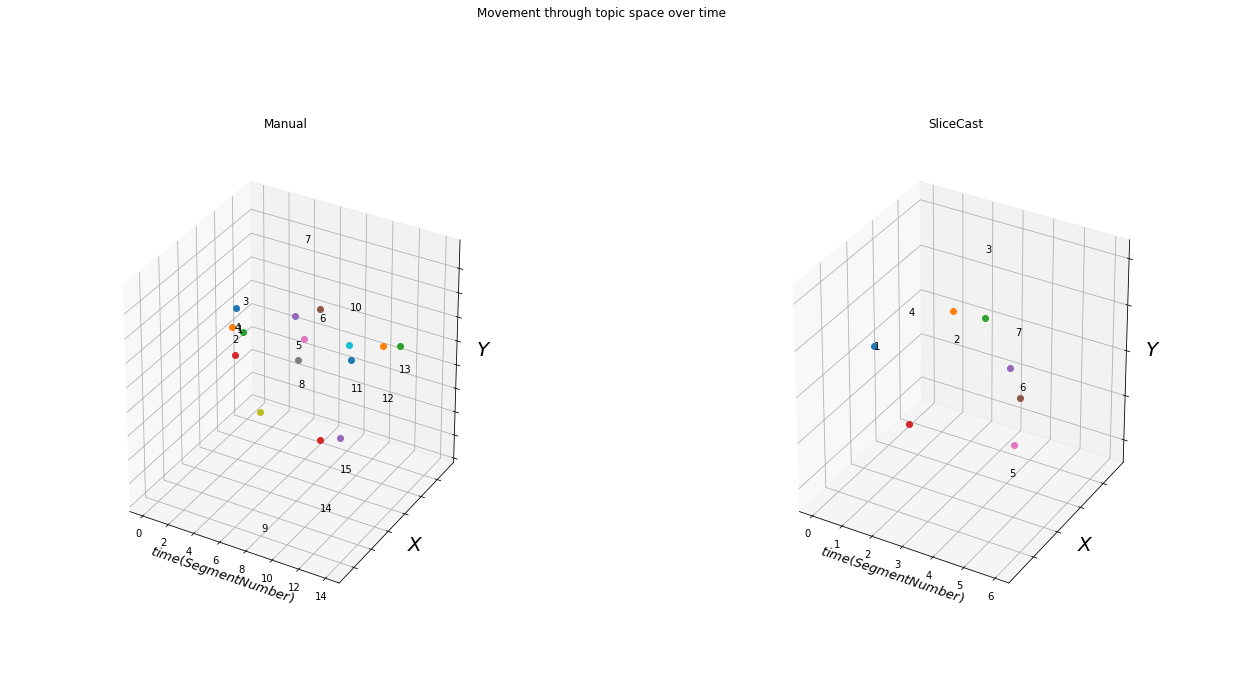

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)
    
df_manual = pd.read_hdf('./SGCW/Topic_avs_df_manual.h5', key='dfs')
labels_manual = df_manual['Topic_Num'].values
df_slice = pd.read_hdf('./SGCW/Topic_avs_df_slice.h5', key='dfs')
labels_slice = df_slice['Topic_Num'].values

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(22,11)) #plt.figaspect(0.5))
fig.suptitle('Movement through topic space over time')

# set up the axes for the first plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

##MANUAL ----------------------------------------------------------
# Data for a three-dimensional line
word_emb_xs = df_manual['Av_X'].values
word_emb_ys = df_manual['Av_Y'].values
label_seg_df = pd.read_hdf('./SGCW/segs_manual_info.h5', key='dfs')
segment_numbers = label_seg_df['first_sent_numbers'].values
print('segment_numbers', segment_numbers)

#ax.plot3D(xs, segment_numbers, ys, 'bo-')
ax1.set_xlabel('$time (Segment Number)$', fontsize=13)
ax1.set_ylabel('$X$', fontsize=20, rotation = 0)
ax1.set_zlabel('$Y$', fontsize=20)
ax1.zaxis.set_rotate_label(False) 
ax1.set_title('Manual')

cnt = 0
# (old_x, old_y, old_z) = (0, 0, 0)
for x, y, z, label in zip(segment_numbers, word_emb_xs, word_emb_ys, labels_manual):
  cnt +=1
  ax1.plot([x], [y], [z],'o') #markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)
  ax1.text(x, y, z, label+1, size=10)
  if cnt ==1:
    (old_x, old_y, old_z) = (x, y, z)
    continue

  a = Arrow3D([old_x, x], [old_y,y], [old_z, z], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
  ax1.add_artist(a)

  (old_x, old_y, old_z) = (x, y, z)


## AXIS STUFF
ax1.dist = 13
ax1 = plt.gca()
# ax.xaxis.set_ticklabels([])
ax1.yaxis.set_ticklabels([])
ax1.zaxis.set_ticklabels([])

# for line in ax.xaxis.get_ticklines():
#     line.set_visible(False)
for line in ax1.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax1.zaxis.get_ticklines():
    line.set_visible(False)

##SLICE ----------------------------------------------------------

# set up the axes for the second plot
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

# Data for a three-dimensional line
word_emb_xs = df_slice['Av_X'].values
word_emb_ys = df_slice['Av_Y'].values
label_seg_df = pd.read_hdf('./SGCW/segs_slice_info.h5', key='dfs')
segment_numbers = label_seg_df['first_sent_numbers'].values

#ax.plot3D(xs, segment_numbers, ys, 'bo-')
ax2.set_xlabel('$time (Segment Number)$', fontsize=13)
ax2.set_ylabel('$X$', fontsize=20, rotation = 0)
ax2.set_zlabel('$Y$', fontsize=20)
ax2.zaxis.set_rotate_label(False) 
ax2.set_title('Slice')

cnt = 0
# (old_x, old_y, old_z) = (0, 0, 0)
for x, y, z, label in zip(segment_numbers, word_emb_xs, word_emb_ys, labels_slice):
  cnt +=1
  ax2.plot([x], [y], [z],'o') #markerfacecolor='k', markeredgecolor='k', marker='o', markersize=5, alpha=0.6)
  ax2.text(x, y, z, label+1, size=10)
  if cnt ==1:
    (old_x, old_y, old_z) = (x, y, z)
    continue

  a = Arrow3D([old_x, x], [old_y,y], [old_z, z], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
  ax2.add_artist(a)

  (old_x, old_y, old_z) = (x, y, z)

## AXIS STUFF
ax2.dist = 13
ax2 = plt.gca()
# ax2.xaxis.set_ticklabels([])
ax2.yaxis.set_ticklabels([])
ax2.zaxis.set_ticklabels([])

# for line in ax2.xaxis.get_ticklines():
#     line.set_visible(False)
for line in ax2.yaxis.get_ticklines():
    line.set_visible(False)
for line in ax2.zaxis.get_ticklines():
    line.set_visible(False)

fig.show()

segment_numbers [ 65 104 126 145 165 169 224 261 363 396 472 506 521 544 580]


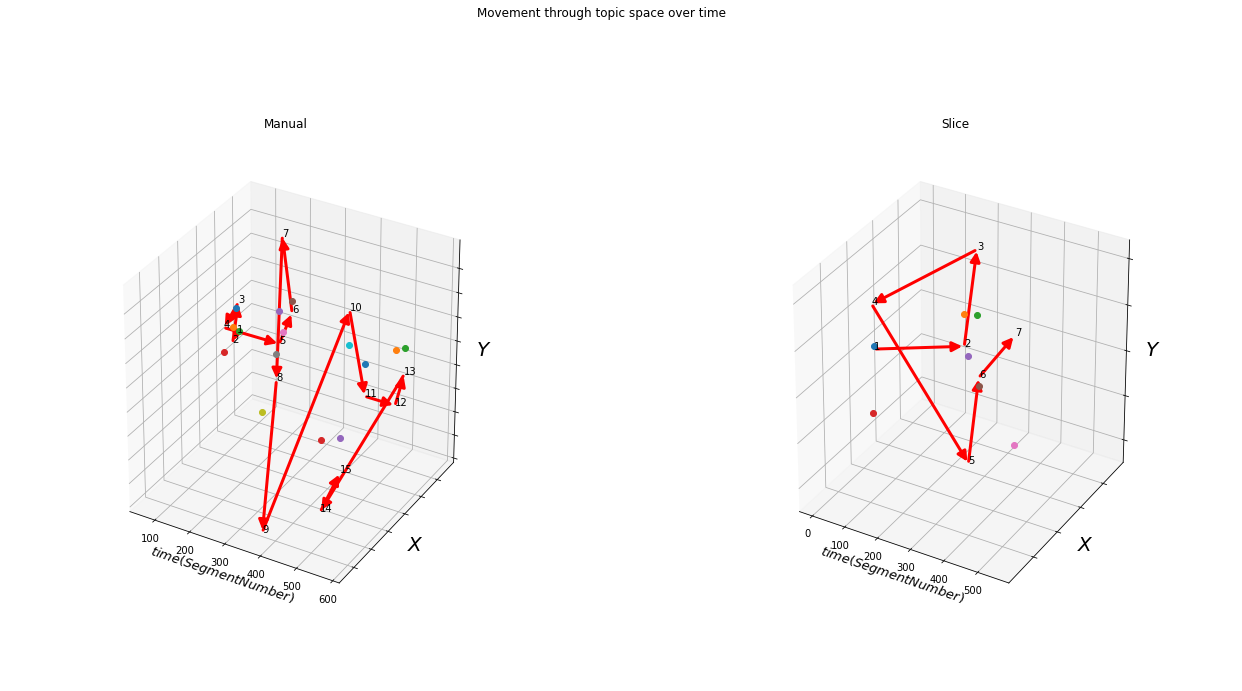

In [ ]:

mkdir GloVe
curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
unzip GloVe/glove.840B.300d.zip -d GloVe/
mkdir fastText
curl -Lo fastText/crawl-300d-2M.vec.zip https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
unzip fastText/crawl-300d-2M.vec.zip -d fastText/